# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [8]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [9]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [10]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [11]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [12]:
# Check the result:

A @ x - b

array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
        0.00000000e+00,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


$$
A x = b
$$

$$
x_{n + 1} = B x_{n} + c\;,
$$

$$
B = D^{-1} (A - D) \qquad \text{и} \qquad c = D^{-1} b
$$



In [13]:
def jacobi(A, b, n):
    diag = np.diag(A)
    B = np.diag(1. / diag) @ (np.diag(diag) - A)
    norm = np.linalg.norm(B)
    c = np.diag(1. / diag) @ b
    x = np.ones(b.shape)
    for i in range(n):
        x = B @ x + c
    return x, norm 

1) Проверим алгоритм на диагонально диминирующей матрице:

In [14]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x, norm = jacobi(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 0.2526942113754388

Ax - b =  [0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


Алгоритм сходится, так как истинное решение системы отличается от решения, полученного итерациями Якоби, на величину не более -16 порядка.

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

In [15]:
n = 5
A = rndm.uniform(size=(n, n))
np.fill_diagonal(A, A.min())
b = rndm.uniform(size=n)
x, norm = jacobi(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 324.1458705995473

Ax - b =  [1.54289709e+240 9.64762590e+239 1.59035431e+240 1.87831129e+240
 1.77780904e+240]


Если матрица не доминирующая по диагонали, то итерационный метод расходится. 

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

||B||=  6.25678890267601
Ax - b =  [7.71961775e+30 2.78841070e+31 8.31420833e+30 6.67909368e+30
 2.20839081e+31]
||B||=  9.911727031947006
Ax - b =  [2.00935174e+28 1.91885702e+28 4.84129679e+28 3.53680240e+28
 3.67597821e+28]
||B||=  5.8145881162559325
Ax - b =  [2.84600078e+26 1.56112014e+26 4.12559927e+26 1.87231645e+26
 3.08556726e+26]
||B||=  2.8236689960921937
Ax - b =  [1.24660607e+17 8.18907596e+16 1.18412376e+17 1.25170213e+17
 8.71232904e+16]
||B||=  4.00203717176218
Ax - b =  [1.49322842e+20 1.81426036e+20 1.82696619e+20 1.02484764e+20
 9.30176357e+19]
||B||=  3.809846116992143
Ax - b =  [1.06061866e+23 1.29443894e+23 1.17282836e+23 9.98279436e+22
 9.32317106e+22]
||B||=  2.9938792200043007
Ax - b =  [2.93176296e+17 4.76990971e+17 1.91701994e+17 4.78955929e+17
 5.98796854e+17]
||B||=  2.217454649562935
Ax - b =  [2.22415386e+11 1.93449554e+11 2.32286158e+11 1.11950594e+11
 1.97989587e+11]
||B||=  2.0550009586450377
Ax - b =  [1.68521649e+10 1.44059703e+10 1.15188729e+10 1.68

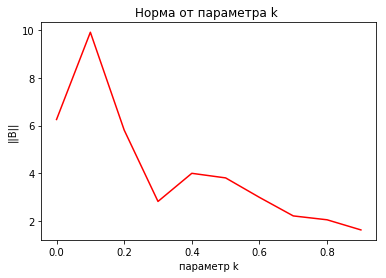

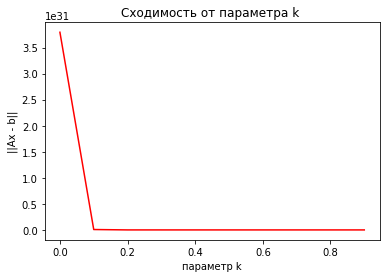

In [96]:
k = []
y = []
norm = []
for i in np.arange(0, 1, 0.1):
    n = 5
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 50)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-',color='red')
plt.title('Норма от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-',color='red')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

4) Посмотрим как завист сходимость от параметра n (размер матрицы)

||B||=  0.1572182305954294
Ax - b =  [0. 0. 0.]
||B||=  0.2019418933353781
Ax - b =  [0. 0. 0. 0.]
||B||=  0.26277465842952225
Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.38777878e-17  0.00000000e+00
  0.00000000e+00]
||B||=  0.2884710975868155
Ax - b =  [ 5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.38777878e-17 -5.55111512e-17]
||B||=  0.37728571765554364
Ax - b =  [-6.93889390e-18  6.93889390e-18  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00]
||B||=  0.42133706706525936
Ax - b =  [ 0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16]
||B||=  0.43960697803561766
Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17 -1.11022302e-16 -1.11022302e-16
  6.93889390e-18]
||B||=  0.5603322178463814
Ax - b =  [0.00000000e+00 1.11022302e-16 1.11022302e-16 2.22044605e-16
 0.00000000e+00 1.11022302e-16 1.11022

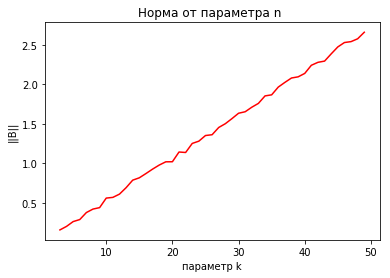

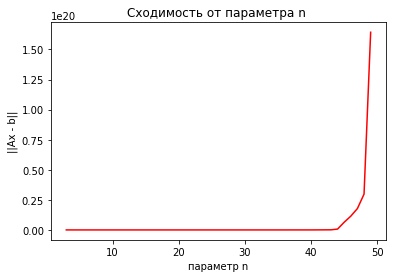

In [102]:
k = []
y = []
norm = []
for n in range(3, 50):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 50)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-',color='red')
plt.title('Норма от параметра n ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-',color='red')
plt.title('Cходимость от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||Ax - b||')
plt.show()

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

$$Ax=b$$

$$A=L+D+U$$ 

$$(нижненетреугольная, диагональная, верхнетреугольная)$$

$$\Rightarrow x_{n+1}=-(L+D)^{-1}\cdot U\cdot x_{n}+(L+D)^{-1}\cdot b$$

$$B=-(L+D)^{-1}\cdot U \qquad \text{и} \qquad c=(L+D)^{-1}\cdot b$$

In [74]:
from numpy.linalg import inv

def seidel(A, b, n):
    x = np.ones_like(b)
    D = np.diag(np.diag(A))  
    L = np.triu(A, k=1)
    U = np.tril(A, k=-1)
    B = -inv(L + D) @ U 
    c = inv(L + D) @ b 
    LD = inv(L + D)
    norm = np.linalg.norm(B) 
    for i in range(n):
        x = LD @ (b - U @ x)
    return x, norm 

1) Проверим алгоритм на диагонально диминирующей матрице:

In [75]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x, norm = seidel(A, b, 100)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 0.14432287812934927

Ax - b =  [-2.22044605e-16  5.55111512e-17  0.00000000e+00  0.00000000e+00
  2.77555756e-17]


Алгоритм сходится, так как истинное решение системы отличается от решения, полученного итерациями Сеиделя, на величину не более -16 порядка.

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

In [20]:
n = 5
A = rndm.uniform(size=(n, n))
np.fill_diagonal(A, A.min())
b = rndm.uniform(size=n)
x, norm = seidel(A, b, 50)
print('||B||= {}\n'.format(norm))
print('Ax - b = ', A @ x - b)

||B||= 2223972.408588498

Ax - b =  [ 1.75721652e+246 -3.93503464e+245  1.46431701e+246  4.72864763e+247
  9.70323808e+230]


Если матрица не доминирующая по диагонали, то итерационный метод расходится. 

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

||B||=  6.936041774791048
Ax - b =  [ 1.47573953e+20  1.00149118e+36 -2.43364422e+35 -4.02424375e+35
  3.43820173e+36]
||B||=  2.732158637363536
Ax - b =  [-4.28546088e-14  3.30387730e+01  1.98960649e+01  7.85984068e+01
  6.50231696e+01]
||B||=  1.1579221842310987
Ax - b =  [0.00000000e+00 0.00000000e+00 5.55111512e-17 0.00000000e+00
 2.77555756e-17]
||B||=  1.0944459371979078
Ax - b =  [ 1.38777878e-16  2.77555756e-17  0.00000000e+00 -6.93889390e-18
  0.00000000e+00]
||B||=  0.6675250817649329
Ax - b =  [ 0.00000000e+00  1.11022302e-16  0.00000000e+00 -2.77555756e-17
 -1.11022302e-16]
||B||=  0.7087506235764931
Ax - b =  [-5.55111512e-17 -5.55111512e-17 -1.11022302e-16  0.00000000e+00
 -1.11022302e-16]
||B||=  0.5097153478597455
Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00]
||B||=  0.431114006986003
Ax - b =  [-2.77555756e-17  0.00000000e+00  0.00000000e+00 -2.77555756e-17
 -5.55111512e-17]
||B||=  0.33719177908726783
Ax - b =  [ 0.000000

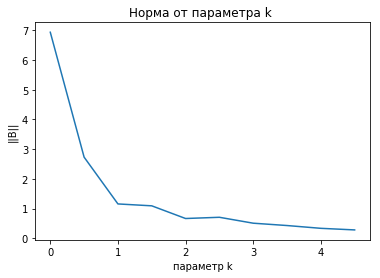

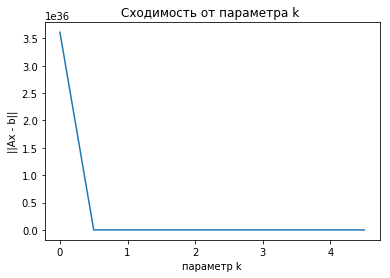

In [82]:
k = []
y = []
norm = []
for i in np.arange(0, 5, 0.5):
    n = 5
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x, norma = seidel(A, b, 50)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-')
plt.title('Норма от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

4) Посмотрим как завист сходимость от параметра n (размер матрицы)

||B||=  0.12995360806542666
Ax - b =  [-6.9388939e-18  0.0000000e+00  0.0000000e+00]
||B||=  0.2624245062234644
Ax - b =  [-5.55111512e-17  0.00000000e+00 -1.11022302e-16 -1.11022302e-16]
||B||=  0.28316389719000107
Ax - b =  [ 0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
||B||=  0.3157917988085883
Ax - b =  [ 5.55111512e-17  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  0.00000000e+00]
||B||=  0.3083475650770231
Ax - b =  [ 0.00000000e+00  0.00000000e+00  1.11022302e-16  1.11022302e-16
  0.00000000e+00 -1.11022302e-16  0.00000000e+00]
||B||=  0.4125117787644829
Ax - b =  [ 1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00]
||B||=  0.49815136085850403
Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17
  0.00000000e+00  0.00000000e+00 -1.11022302e-16  1.11022302e-16
 -1.11022302e-16]
||B||=  0.47289319479416997
Ax - b =  [ 0.0000000

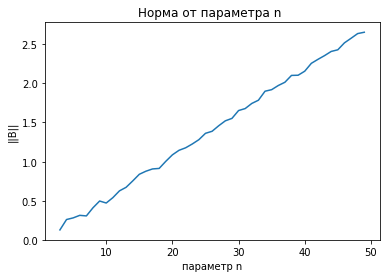

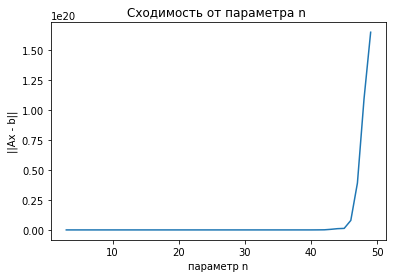

In [104]:
k = []
y = []
norm = []
for n in range(3, 50):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x, norma = jacobi(A, b, 50)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, norm, '-')
plt.title('Норма от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||B||')
plt.show()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||Ax - b||')
plt.show()

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)


$$r_n=A x_n - b$$

$$\tau_{n+1} = \frac{(A r_n, r_n)}{\| A r_n\|^2}$$

$$x_{n+1}=x_n-\tau_{n+1}r_n$$

In [91]:
def minres(A, b, n):
    x = np.ones_like(b)
    t = []
    for i in range(n):
        r = A @ x - b
        tau = np.dot(A @ r, r) / np.dot(A @ r, A @ r)
        t.append(tau)
        x = x - tau * r
    plt.figure()
    plt.plot(np.arange(n) + 1, t, '-')
    plt.title('Параметр tau от номера итерации n')
    plt.xlabel('Номер итерации n')
    plt.ylabel('Параметр tau')
    plt.show()
    return x

1) Проверим алгоритм на диагонально диминирующей матрице:

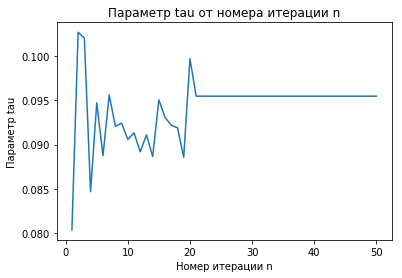

Ax - b =  [0.00000000e+00 1.11022302e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [92]:
n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x = minres(A, b, 50)
print('Ax - b = ', A @ x - b)

Сходится

2) Проверим алгоритм на матрице, на диагонале которой стоят не доминирующие элементы:

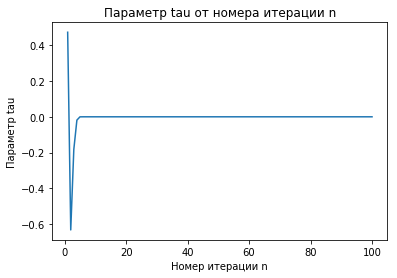

Ax - b =  [-0.34070587  0.19991592 -0.46390343  0.41844753 -0.36895339]


In [63]:
n = 5
A = rndm.uniform(size=(n, n)) 
b = rndm.uniform(size=n)
x = minres(A, b, 100)
print('Ax - b = ', A @ x - b)

Расходится

3) Посмотрим как завист сходимость от параметра k (от которого зависят элементы на диагонале)

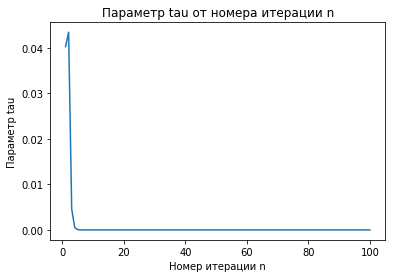

Ax - b =  [-0.35043934  0.04818626 -0.23336242  0.47296364 -0.21586511 -0.03649531
  0.14705466  0.21673981  0.16315954  0.50085578  0.30699908  0.59173094
 -0.29915479 -0.07696788  0.33587413  0.35301906 -0.01059087  0.1786002
  0.11150377  0.2933899   0.71901888 -0.53584735 -0.23459263 -0.66137704
  0.17009743  0.20716312 -0.00742228  0.01045741 -0.02110471 -0.41051999
 -0.25226134  0.20944757  0.30421017 -0.29128612  0.18554925 -0.54316467
 -0.52325174  0.19433353 -0.639267   -0.30642273  0.54280843 -0.03336621
 -0.00373261 -0.21984999  0.37849024 -0.20676521 -0.0845247   0.18627039
 -0.61571324  0.1552187 ]


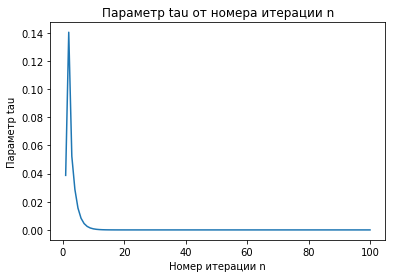

Ax - b =  [ 0.10561532 -0.31637059 -0.12379031 -0.36081321  0.14192967  0.55854704
  0.01822847  0.21013362 -0.23254619 -0.27332951 -0.14230006 -0.00664083
  0.12974021  0.1569485  -0.25925364  0.20969157  0.23322531  0.00457387
  0.05449171  0.51341662 -0.26984299 -0.00953603  0.4620896   0.3942285
 -0.20738269  0.14236892  0.16081914  0.40297782 -0.04926357 -0.10777256
  0.43471113  0.4596062  -0.43602873 -0.4836313  -0.19238402 -0.48474141
 -0.45824883 -0.60995837  0.29515375 -0.46392171  0.41845865 -0.45799532
  0.05666295  0.19405973 -0.19705496  0.16545505  0.28102305  0.16124366
  0.00429297 -0.27930783]


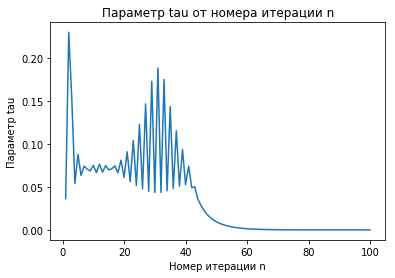

Ax - b =  [ 0.06291934 -0.0394997  -0.03834621 -0.07623242  0.06956754 -0.04628491
  0.02069401 -0.04091668 -0.04421262  0.03859708  0.02250085  0.0314287
  0.07350407  0.0061639   0.02973101  0.00089006  0.02211917  0.00185586
 -0.09136468  0.00394357  0.03577892  0.00583617 -0.05383682 -0.02129371
 -0.01748563  0.01793904 -0.13270025 -0.06439975  0.05611062 -0.02863517
  0.02956279  0.03699051  0.00218204 -0.06170006  0.0480159  -0.06191808
  0.0105493  -0.03249156  0.02630931 -0.08696835  0.05431125  0.05631287
  0.00086939  0.03652962 -0.01487357 -0.01440012  0.07929713  0.04359391
 -0.01904817  0.02715962]


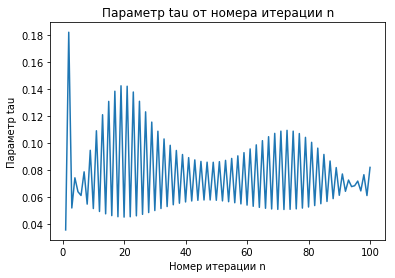

Ax - b =  [-1.51959395e-04  4.58024252e-05  3.93324980e-05  6.13247425e-05
 -3.77668179e-05 -2.83909569e-05 -6.36615469e-05 -7.74566153e-06
 -2.84659947e-05 -2.97904001e-05 -4.24736066e-05 -7.27483290e-05
 -5.45507849e-05  1.29562700e-05  3.06835507e-05  1.99945401e-05
 -2.30390649e-05  3.65839444e-05 -2.25455841e-05  4.83427700e-05
  8.51273780e-06 -1.75641571e-05  9.47880040e-06 -8.70165088e-05
  3.56137094e-05 -5.86868665e-05  8.84198223e-05 -7.32541795e-05
  3.17698337e-05 -1.25477081e-05 -8.51538145e-06 -7.25051647e-05
 -4.31669208e-05 -3.63154763e-05 -1.18766780e-05 -2.77891791e-05
 -2.32742784e-05  6.73451097e-05 -1.16257010e-05  9.13600035e-06
  1.51032515e-05  8.36197660e-05 -4.41327654e-06 -1.33251576e-04
  5.27218931e-05  1.74681516e-05  5.12709922e-05 -1.10291782e-04
 -1.54440574e-05 -2.63619808e-05]


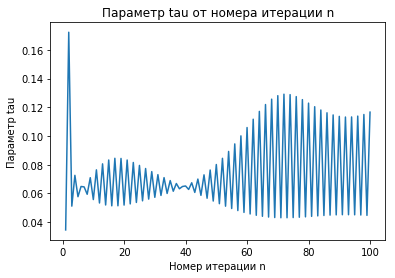

Ax - b =  [-8.35473202e-09 -3.86651167e-09 -1.02232807e-08  3.17855070e-09
 -1.02597754e-08 -6.50363607e-09 -1.44137258e-09 -4.66047489e-09
 -3.89576571e-09  4.22717905e-09 -9.13500831e-10 -1.91518623e-09
 -6.00393568e-09 -3.91709554e-09 -5.31358024e-09 -5.73564773e-09
 -2.82441770e-09 -6.25753827e-09  1.85498361e-09  5.24494331e-09
 -1.70300252e-09  4.39905443e-09 -4.48805709e-09  3.72039266e-09
  1.04148601e-09 -1.01852526e-10 -1.58780400e-09 -7.41907502e-09
  1.96177363e-09  7.91144927e-13 -2.45879150e-09 -5.06066250e-09
 -6.62356292e-09 -8.08485490e-09 -5.79360449e-10  1.04004927e-09
 -3.88458732e-09 -3.83699028e-09 -9.09269993e-10  3.63731273e-09
 -7.76079911e-09  1.67727054e-09 -1.53161911e-09  4.78183937e-10
 -5.35848044e-09  9.14975762e-10  3.79723275e-09  2.43766562e-09
  5.66085623e-09 -2.54293558e-09]


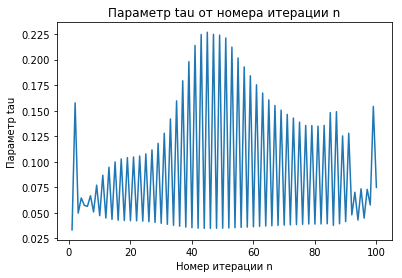

Ax - b =  [ 3.33066907e-16  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  1.11022302e-16 -2.22044605e-16  1.11022302e-16
 -1.11022302e-16  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  5.55111512e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -1.11022302e-16  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -2.22044605e-16
  5.55111512e-17 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00 -5.55111512e-17
 -4.16333634e-17 -1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00 -3.33066907e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00]


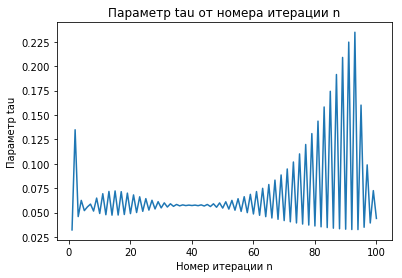

Ax - b =  [ 1.11022302e-16 -5.55111512e-17  0.00000000e+00  1.11022302e-16
  0.00000000e+00 -5.55111512e-17  2.77555756e-17  0.00000000e+00
  0.00000000e+00  2.77555756e-17  0.00000000e+00 -1.11022302e-16
  1.11022302e-16  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -2.77555756e-17  0.00000000e+00
 -5.55111512e-17 -1.11022302e-16  0.00000000e+00 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.55111512e-17
  1.11022302e-16  0.00000000e+00  5.55111512e-17  0.00000000e+00
  8.32667268e-17  2.77555756e-17  0.00000000e+00 -1.38777878e-16
  0.00000000e+00  5.55111512e-17  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00]


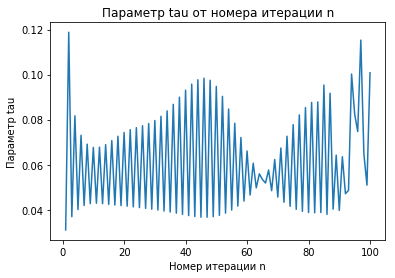

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.93889390e-18
  0.00000000e+00  1.11022302e-16  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  1.11022302e-16
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


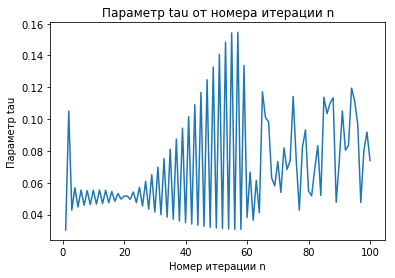

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.77555756e-17
  0.00000000e+00  0.00000000e+00  2.77555756e-17  2.77555756e-17
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.11022302e-16  1.11022302e-16
 -2.77555756e-17  1.11022302e-16  5.55111512e-17  0.00000000e+00
 -5.55111512e-17  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


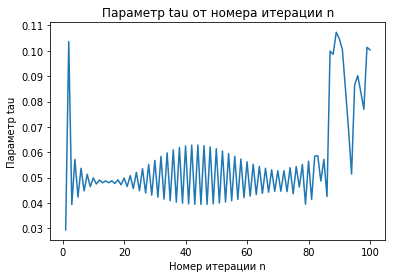

Ax - b =  [ 0.00000000e+00  2.77555756e-17  0.00000000e+00 -5.55111512e-17
 -2.77555756e-17 -1.11022302e-16 -1.38777878e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.38777878e-17  9.71445147e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  1.11022302e-16
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16  2.77555756e-17  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.55111512e-17 -2.77555756e-17  0.00000000e+00 -5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


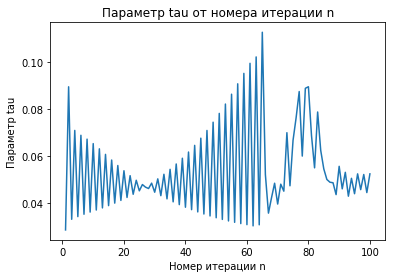

Ax - b =  [-1.38777878e-17 -1.38777878e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.32667268e-17
  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  0.00000000e+00 -1.11022302e-16 -1.11022302e-16
  0.00000000e+00 -1.11022302e-16 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16 -1.11022302e-16 -2.77555756e-17 -2.77555756e-17
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  1.38777878e-17
 -5.55111512e-17  0.00000000e+00  0.00000000e+00 -1.38777878e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17]


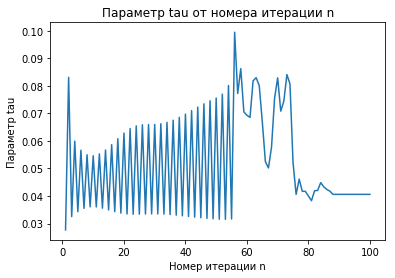

Ax - b =  [-1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.11022302e-16
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.11022302e-16
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


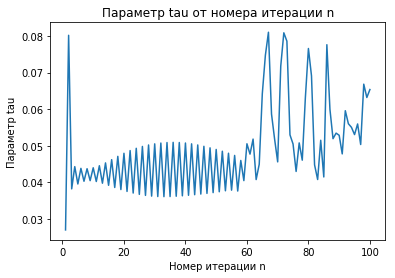

Ax - b =  [ 0.00000000e+00  2.77555756e-17  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.77555756e-17  5.55111512e-17 -5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00 -2.77555756e-17
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  1.11022302e-16  8.32667268e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17]


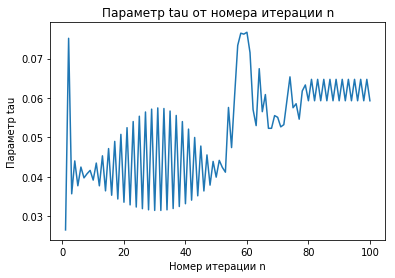

Ax - b =  [-5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.38777878e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.38777878e-17  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  1.11022302e-16 -2.77555756e-17 -1.11022302e-16
  2.77555756e-17  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00]


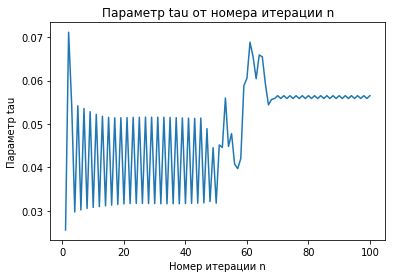

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  2.77555756e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38777878e-17
  0.00000000e+00  0.00000000e+00]


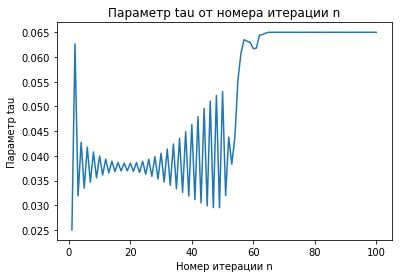

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  4.16333634e-17  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -1.38777878e-17  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.16333634e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  1.11022302e-16  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.16333634e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.55111512e-17  1.11022302e-16  1.38777878e-17
  2.77555756e-17 -1.11022302e-16]


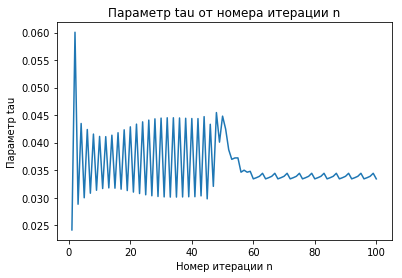

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
 -5.55111512e-17 -1.11022302e-16 -5.55111512e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.55111512e-17 -5.55111512e-17
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
 -4.16333634e-17 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -1.11022302e-16
 -2.77555756e-17  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
 -2.77555756e-17 -2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


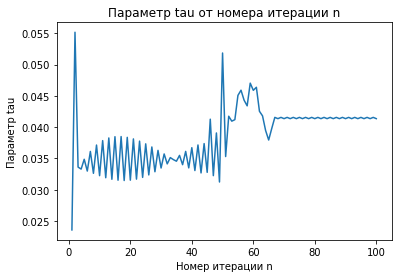

Ax - b =  [ 5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.38777878e-17  0.00000000e+00  2.77555756e-17  2.77555756e-17
  0.00000000e+00  0.00000000e+00  1.11022302e-16  2.77555756e-17
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  1.11022302e-16  0.00000000e+00  0.00000000e+00
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  2.77555756e-17
  2.77555756e-17  0.00000000e+00]


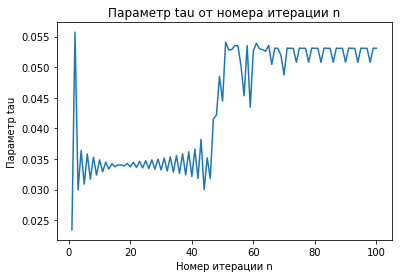

Ax - b =  [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.11022302e-16  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  0.00000000e+00  2.77555756e-17 -1.11022302e-16  2.22044605e-16
  0.00000000e+00  2.77555756e-17  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00  0.00000000e+00
  1.11022302e-16 -5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


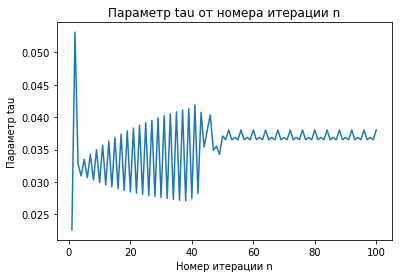

Ax - b =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  0.00000000e+00  0.00000000e+00 -5.55111512e-17
  0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.55111512e-17 -1.11022302e-16
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.77555756e-17 -1.11022302e-16
 -1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00]


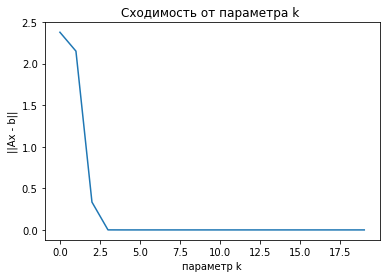

In [94]:
k = []
y = []
norm = []
for i in np.arange(0, 20):
    n = 50
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)
    x = minres(A, b, 100)
    print('Ax - b = ', A @ x - b)
    k.append(i)
    y.append(np.linalg.norm(A @ x - b))
    
    
plt.figure()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра k ')
plt.xlabel('параметр k')
plt.ylabel('||Ax - b||')
plt.show()

/Users/kirillsikamov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


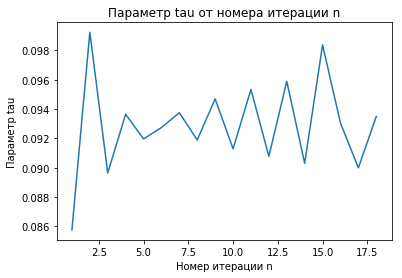

||B||=  2.6497313239663383
Ax - b =  [nan nan nan]


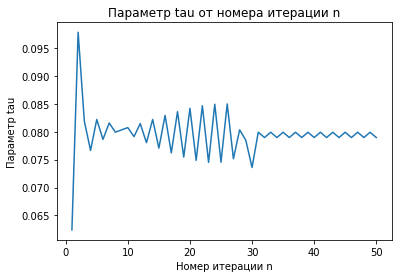

||B||=  2.6497313239663383
Ax - b =  [ 0.00000000e+00  0.00000000e+00 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -1.11022302e-16 -1.11022302e-16 -5.55111512e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16]


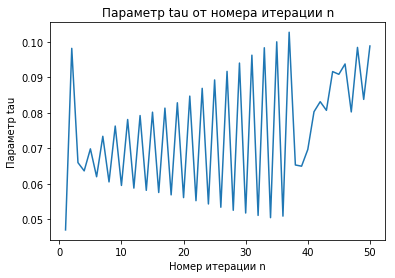

||B||=  2.6497313239663383
Ax - b =  [ 0.00000000e+00 -6.93889390e-18  0.00000000e+00 -1.38777878e-17
  0.00000000e+00  0.00000000e+00 -1.38777878e-17 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.38777878e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.77555756e-17  0.00000000e+00  0.00000000e+00]


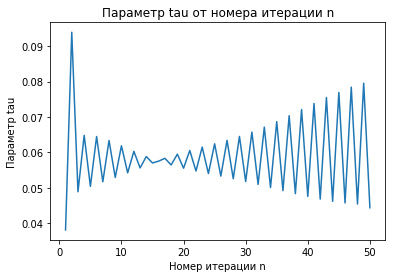

||B||=  2.6497313239663383
Ax - b =  [-3.33066907e-16  1.11022302e-16 -4.44089210e-16 -1.38777878e-16
  1.11022302e-16  1.11022302e-16 -8.32667268e-17 -2.22044605e-16
 -5.55111512e-17 -6.93889390e-17  1.94289029e-16  1.11022302e-16
  0.00000000e+00  8.32667268e-17  1.11022302e-16 -1.11022302e-16
 -2.77555756e-16  0.00000000e+00  1.11022302e-16  0.00000000e+00
 -1.11022302e-16  0.00000000e+00 -3.33066907e-16 -2.22044605e-16
 -1.11022302e-16  0.00000000e+00  0.00000000e+00 -1.94289029e-16
  0.00000000e+00  1.11022302e-16 -8.32667268e-17 -5.55111512e-17
  3.19189120e-16]


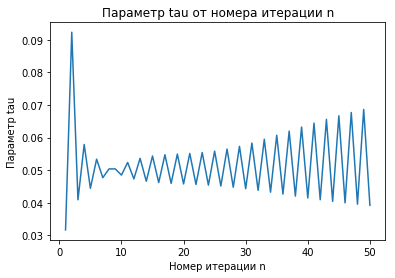

||B||=  2.6497313239663383
Ax - b =  [ 2.14273044e-14 -1.91069383e-13  8.64586180e-14 -4.09672296e-14
 -1.23678845e-13  2.67175171e-13 -1.02917674e-13 -2.89768209e-14
  2.66175970e-14 -4.70873340e-14 -1.09467990e-13  7.34967642e-14
  8.40993941e-15 -1.96065386e-13 -1.99618100e-13  1.49324997e-14
  2.22044605e-14 -1.33226763e-15 -6.66133815e-16 -1.45439216e-14
  3.21964677e-15 -4.44089210e-16  1.00142117e-13 -1.44662060e-13
 -1.22790667e-13  7.47180096e-14  4.24105195e-14  4.11892742e-14
 -1.59094959e-13 -1.57762692e-13  3.50830476e-14 -2.70561351e-13
 -1.43163259e-13 -3.08364445e-13  6.84174939e-14 -7.63833441e-14
  1.57290847e-13  4.82947016e-14  3.10862447e-14 -4.87387908e-14
 -5.49837953e-14 -1.35780276e-13  3.83026943e-14]


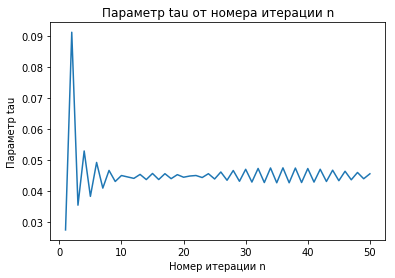

||B||=  2.6497313239663383
Ax - b =  [-8.59068372e-12 -2.86594082e-11  1.90232829e-11  5.90572036e-12
  1.13070941e-11  2.68057798e-11  2.05441220e-11  2.27405872e-11
 -2.53327359e-11 -1.23026589e-11 -7.71160913e-13 -2.04729567e-11
 -1.43398626e-11 -1.35402800e-12  7.31503746e-12 -2.69070322e-11
 -2.41211495e-11 -8.18894952e-12 -3.08723047e-11  3.96205291e-12
 -3.31374372e-11 -4.40719683e-12  5.19251309e-13 -1.27883815e-11
 -5.42843548e-12 -1.28935751e-11 -2.58132404e-11  2.24287255e-12
 -2.39660514e-11  1.02295949e-11  1.44967371e-11 -2.45329312e-11
 -4.21016555e-11 -4.53431181e-11 -1.59855462e-11 -3.94282385e-11
 -2.12815598e-11  1.42517109e-11 -3.38666872e-11 -3.24916760e-11
 -1.05033759e-11  2.23820962e-13  7.22302773e-12 -3.43499673e-11
 -1.47902246e-11  1.54428692e-11 -6.95976610e-12  1.74537051e-11
 -1.49332768e-11 -2.95663494e-12 -2.09653961e-11 -1.97308836e-11
  1.88042915e-11]


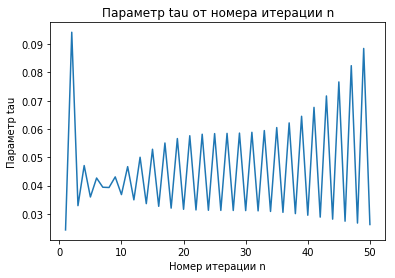

||B||=  2.6497313239663383
Ax - b =  [-9.58211288e-12  4.86632956e-12 -2.57018296e-11 -1.53032587e-11
 -1.61648472e-11  2.22044605e-11  1.51345603e-11  1.86860527e-11
  3.11417558e-14  1.39001033e-11 -6.08402217e-12  7.27540250e-12
 -3.75327547e-12 -3.14520632e-11  9.30178157e-12  1.26429700e-11
  8.68682903e-12  2.14694929e-12 -1.16304744e-11  9.09716746e-12
 -2.07354134e-11 -4.55679938e-12 -5.85798077e-12 -2.64444022e-12
  8.33744185e-12 -2.25892638e-11  1.34832145e-11  9.35707067e-12
  1.27221567e-11  1.21129218e-11 -1.97099281e-11 -9.54014645e-13
  5.57054403e-13  2.82318613e-12 -1.11269882e-11 -9.02111719e-12
  1.03126951e-11 -1.67106329e-11  1.19108057e-11 -2.37032616e-13
  1.10328413e-11  8.78216944e-12 -1.79539716e-12  3.02291525e-12
  1.54977142e-11 -2.12346807e-12 -9.16211551e-12  1.43760004e-11
 -1.26065824e-11 -1.89632754e-11 -4.20924406e-12 -9.92039784e-12
 -1.42875711e-11 -1.23521193e-11  6.45178355e-13 -1.39600553e-11
 -2.36356490e-11  4.72455408e-12 -1.99870120e-11  5.2

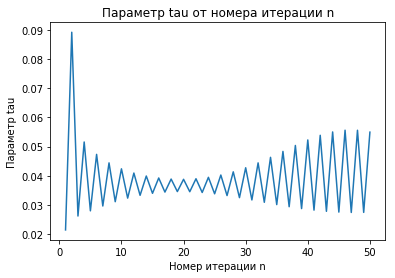

||B||=  2.6497313239663383
Ax - b =  [-8.83764173e-11 -1.46921811e-09 -1.72311626e-09  3.95808164e-10
 -1.43247442e-09  2.07179385e-10 -3.14940754e-09 -1.40723522e-09
 -3.00396763e-10 -1.41935019e-09  2.40623965e-10 -2.86931548e-09
 -1.51611668e-09  2.39253062e-11 -3.10968690e-09 -3.60337116e-09
 -1.37743791e-09 -6.09329298e-09 -3.13129522e-10 -1.57993241e-09
 -5.23130850e-09 -2.11699547e-11 -7.85628229e-10 -1.66246417e-09
 -4.37206926e-09  2.11282047e-09  1.62627045e-09 -4.68455585e-09
 -3.05387493e-09  2.56172916e-10 -1.31545086e-09 -8.71085315e-10
  1.16573118e-09 -1.78159279e-09 -1.66822633e-09 -7.14671877e-10
 -1.83446436e-09  3.78991283e-11 -1.13161609e-09  1.13363696e-09
  1.22346799e-09 -2.94001257e-09  1.55674923e-09 -3.32911654e-09
 -1.19921006e-09 -3.54152485e-10 -7.51122720e-10  1.04733322e-09
 -4.72084094e-10  6.88468171e-11  2.57421762e-09 -3.51876872e-09
 -1.56735969e-09 -8.75207906e-10 -1.11093235e-09 -1.48320201e-09
 -1.31052247e-09 -3.10261106e-09  1.75186787e-09 -2.2

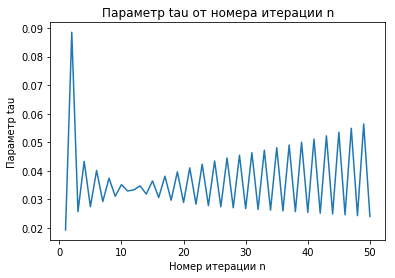

||B||=  2.6497313239663383
Ax - b =  [-5.73850703e-08  7.88446219e-09 -2.84364339e-08 -3.26694453e-08
 -6.89319402e-09 -2.26389878e-08 -4.60836043e-08 -2.31558100e-08
 -2.54201051e-08  1.58712822e-08 -1.62359829e-08 -2.30866916e-08
 -5.94411065e-09 -4.18445749e-08 -1.73044790e-09 -1.95102325e-08
  1.35393182e-08  2.82849973e-08  1.42507739e-09  1.31206239e-08
  3.16701126e-09 -7.54498386e-09 -9.29872501e-09  1.80385326e-08
 -6.03541761e-09 -2.95890605e-08 -7.34426109e-09  7.46529649e-09
 -1.16587265e-08  6.14631973e-08 -1.46719946e-08 -1.83552287e-08
  1.23126864e-09 -5.21435504e-08  2.68668858e-08  5.75261794e-09
 -1.67590870e-08  2.23826455e-09  1.20429763e-08  5.19993651e-09
  5.19877914e-08  8.08247216e-09 -2.45562984e-08 -1.01404729e-09
 -3.92067701e-08  7.96383182e-10  7.08403336e-11 -6.88403545e-09
  1.50879764e-09  1.35302081e-09  4.10771759e-08  4.14357740e-08
 -2.45912262e-08  6.83525703e-09  4.42324630e-08 -3.94348953e-09
  8.74163730e-09 -2.63330430e-08 -1.93919950e-08 -1.2

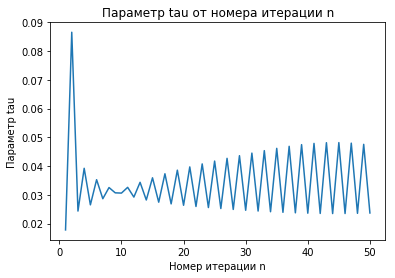

||B||=  2.6497313239663383
Ax - b =  [ 2.52027836e-07  1.59803709e-07  2.83606885e-08  4.83216844e-08
  2.01010364e-07 -7.27940240e-08 -2.45133588e-07 -3.50163925e-08
  5.01496272e-09 -1.58499213e-07  5.74656921e-08  3.30726257e-08
 -1.56543507e-07  4.17315182e-08  4.10411104e-08 -8.98760166e-08
  2.29400275e-07 -1.02305526e-07 -2.62160408e-07 -3.59208094e-07
 -1.42457288e-07  1.69824156e-07  3.05999860e-07 -1.37600938e-07
  3.12752765e-07  1.47857073e-08  4.41172733e-08 -2.01762280e-08
 -1.42232064e-08 -7.51605933e-09  5.72499693e-08 -1.86282309e-07
 -2.73665413e-09 -6.98291179e-08 -1.44879089e-07 -1.15033132e-07
  1.57864518e-07 -9.22909394e-08 -3.11350395e-08 -3.75523164e-07
  5.49344834e-08  4.02742221e-07 -1.99620468e-07  4.85971445e-08
  3.28237368e-08 -1.55644863e-07  1.39901624e-08 -8.77800820e-08
  1.07239027e-07 -8.28460522e-08  8.98765681e-08 -8.55744334e-08
 -4.56973746e-08 -1.31400883e-07  1.61576993e-07 -2.21931088e-08
 -2.05921075e-07 -3.17903407e-07 -5.93763276e-08  3.7

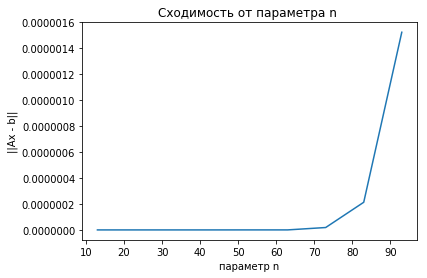

In [107]:
k = []
y = []
norm = []
for n in np.arange(3, 100, 10):
    A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
    b = rndm.uniform(size=n)
    x = minres(A, b, 50)
    print('||B||= ',norma)
    print('Ax - b = ', A @ x - b)
    k.append(n)
    y.append(np.linalg.norm(A @ x - b))
    norm.append(norma)
    
    
plt.figure()
plt.plot(k, y, '-')
plt.title('Cходимость от параметра n ')
plt.xlabel('параметр n')
plt.ylabel('||Ax - b||')
plt.show()